In [1]:
!pip install hiddenlayer

In [2]:
import torch
import torch.nn as nn
import hiddenlayer as hl

In [3]:
class ConvBlock(nn.Module):
    
    def __init__(self, in_channels=1, out_channels=1, kernel_size=1, **kwargs):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        
    def forward(self, x):
      x1 = self.relu(x)

      ######FIRST BRANCH
      x2 = self.bn(x1)
      x3 = self.relu(x2)


      ######SECOND BRANCH
      x4 = self.bn(x1)
      x5 = self.relu(x4)


      ######THIRD BRANCH
      x6 = self.bn(x1)
      x7 = self.relu(x6)

      
      ######THIRD BRANCH
      x8 = self.bn(x1)
      x9 = self.relu(x8)

      c = torch.cat([x3,x5,x7,x9], 1)
      return c

model = ConvBlock()
print(model)

ConvBlock(
  (conv): Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1))
  (bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)


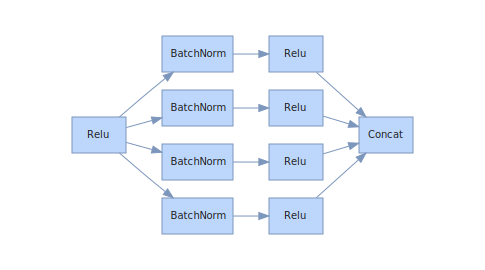

In [4]:
hl_graph = hl.build_graph(model, torch.zeros([1,1,22,22]))
hl_graph.theme = hl.graph.THEMES["blue"].copy()  
hl_graph